<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Week-2:-Python-and-Metro" data-toc-modified-id="Week-2:-Python-and-Metro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Week 2: Python and Metro</a></span><ul class="toc-item"><li><span><a href="#A-quick-geopandas-teaser" data-toc-modified-id="A-quick-geopandas-teaser-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>A quick geopandas teaser</a></span></li><li><span><a href="#Pandas-Data-Types" data-toc-modified-id="Pandas-Data-Types-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Pandas Data Types</a></span></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data exploration</a></span><ul class="toc-item"><li><span><a href="#Counting-unique-values-in-a-column" data-toc-modified-id="Counting-unique-values-in-a-column-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Counting unique values in a column</a></span></li><li><span><a href="#Trimming-the-data" data-toc-modified-id="Trimming-the-data-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Trimming the data</a></span></li><li><span><a href="#Subsetting/querying/filtering-the-data" data-toc-modified-id="Subsetting/querying/filtering-the-data-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Subsetting/querying/filtering the data</a></span></li></ul></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Plotting</a></span></li><li><span><a href="#A-prettier-plot" data-toc-modified-id="A-prettier-plot-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>A prettier plot</a></span></li><li><span><a href="#Back-to-mapping" data-toc-modified-id="Back-to-mapping-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Back to mapping</a></span></li><li><span><a href="#Projections" data-toc-modified-id="Projections-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Projections</a></span></li><li><span><a href="#Iterating-through-rows-in-a-dataframe" data-toc-modified-id="Iterating-through-rows-in-a-dataframe-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Iterating through rows in a dataframe</a></span></li><li><span><a href="#Get-average-lat/lon's" data-toc-modified-id="Get-average-lat/lon's-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Get average lat/lon's</a></span></li><li><span><a href="#Mapping-with-folium" data-toc-modified-id="Mapping-with-folium-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Mapping with folium</a></span><ul class="toc-item"><li><span><a href="#Adding-point-markers" data-toc-modified-id="Adding-point-markers-1.10.1"><span class="toc-item-num">1.10.1&nbsp;&nbsp;</span>Adding point markers</a></span></li></ul></li><li><span><a href="#Unique-values-in-a-column" data-toc-modified-id="Unique-values-in-a-column-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Unique values in a column</a></span></li><li><span><a href="#Update-a-column-based-on-a-query-on-another-column" data-toc-modified-id="Update-a-column-based-on-a-query-on-another-column-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Update a column based on a query on another column</a></span></li></ul></li></ul></div>

# Week 2: Python and Metro

## A quick geopandas teaser
Following our Python bootcamp last week (was it boring? exhilerating? a bit of both?), let's put that programming knowledge into action, using and creating data that reflects a real urban situation.

We start by importing a new module `geopandas`. This is a pretty high level geospatial library, widely used by spatial data scientists all over the world. Don't worry about it too much for now, but know that it allows us to import a variety of spatial data formats, and plot them on a map.

In [1]:
import geopandas as gpd

Next, we import some data. In this case, it is a [shapefile](https://desktop.arcgis.com/en/arcmap/latest/manage-data/shapefiles/what-is-a-shapefile.htm) I downloaded from the [LA Metro's Developer web portal](https://developer.metro.net/bus-rail-gis-data/). Notice that I am using relative paths to point to where the data is located in. the `../` indicates that it is one folder level above, so `../../` takes us two levels above (the project root), and then into the data folder there.

In [29]:
metro = gpd.read_file('../../data/MetroStations/Stations_All_0715.shp')

<div class="alert alert-info">

Note that the reason we use `geopandas` instead of `pandas` (other than the fact that we love maps) is that `pandas` cannot read shapefiles, whereas `geopandas` can.
    
</div>

In [3]:
# what's the data type?
type(metro)

geopandas.geodataframe.GeoDataFrame

In [4]:
# what does the data look like? 
metro.head()

,LINE,LINENUM,LINENUM2,STNSEQ,STNSEQ2,DIR,STOPNUM,STATION,LAT,LONG,TPIS_NAME,POINT_X,POINT_Y,geometry
0,Blue,801,0,21,0,None,80101,Downtown Long Beach Station,33.768071,-118.192921,Long Bch,6.503030e+06,1.738034e+06,POINT (6503030.095 1738033.828)
1,Blue,801,0,22,0,North,80102,Pacific Ave Station,33.772258,-118.193700,Pacific,6.502796e+06,1.739558e+06,POINT (6502796.262 1739558.050)
2,Blue,801,0,18,0,None,80105,Anaheim Street Station,33.781830,-118.189384,Anaheim,6.504115e+06,1.743039e+06,POINT (6504114.567 1743039.068)
3,Blue,801,0,17,0,None,80106,Pacific Coast Hwy Station,33.789090,-118.189382,PCH,6.504120e+06,1.745681e+06,POINT (6504120.152 1745681.179)
4,Blue,801,0,16,0,None,80107,Willow Street Station,33.807079,-118.189834,Willow,6.503995e+06,1.752228e+06,POINT (6503995.170 1752228.119)


Ah! Surprise, surprise. Welcome to your first look at a pandas dataframe. We will cover dataframes more extensively in later sessions, but know that a python dataframe is like an excel spreadsheet. 

The `head()` command shows us the first 5 rows of the dataframe. You can also use `tail()` and `sample()`. Try these commands in the cells below:

In [5]:
# try tail()


In [7]:
# try sample()


## Pandas Data Types

Let's look at the data types for each column. You can collectively get all the datatypes for each column in a dataframe using the `dtypes` command.

In [8]:
metro.dtypes

LINE           object
LINENUM         int64
LINENUM2        int64
STNSEQ          int64
STNSEQ2         int64
DIR            object
STOPNUM         int64
STATION        object
LAT           float64
LONG          float64
TPIS_NAME      object
POINT_X       float64
POINT_Y       float64
geometry     geometry
dtype: object

But there is better command that will get you more info. Yes, the `info` command.

In [9]:
# dataframe info
metro.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LINE       83 non-null     object  
 1   LINENUM    83 non-null     int64   
 2   LINENUM2   83 non-null     int64   
 3   STNSEQ     83 non-null     int64   
 4   STNSEQ2    83 non-null     int64   
 5   DIR        3 non-null      object  
 6   STOPNUM    83 non-null     int64   
 7   STATION    83 non-null     object  
 8   LAT        83 non-null     float64 
 9   LONG       83 non-null     float64 
 10  TPIS_NAME  83 non-null     object  
 11  POINT_X    83 non-null     float64 
 12  POINT_Y    83 non-null     float64 
 13  geometry   83 non-null     geometry
dtypes: float64(4), geometry(1), int64(5), object(4)
memory usage: 9.2+ KB


Wait. That looks different from what we have worked on! As it turns out, pandas datatypes are slightly different from the raw python datatypes. Check out the table below:

<table class="table table-striped">
  <thead>
    <tr>
      <th>Pandas Type</th>
      <th>Native Python Type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>object</td>
      <td>string</td>
      <td>The most general dtype. Will be assigned to your column if column has mixed types (numbers and strings).</td>
    </tr>
    <tr>
      <td>int64</td>
      <td>int</td>
      <td>Numeric characters. 64 refers to the memory allocated to hold this character.</td>
    </tr>
    <tr>
      <td>float64</td>
      <td>float</td>
      <td>Numeric characters with decimals. If a column contains numbers and NaNs (see below), pandas will default to float64, in case your missing value has a decimal.</td>
    </tr>
    <tr>
      <td>datetime64, timedelta[ns]</td>
      <td>N/A (but see the <a href="http://doc.python.org/2/library/datetime.html">datetime</a> module in Python’s standard library)</td>
      <td>Values meant to hold time data. Look into these for time series experiments.</td>
    </tr>
  </tbody>
</table>

## Data exploration

Part of data exploration is learning what is in your data. How many rows are there? What are the columns? How many rows represent a particular slice of the data?

In [11]:
# how many rows and columns?
metro.shape

(83, 14)

In [13]:
# what are the columns?
metro.columns.to_list()

['LINE',
 'LINENUM',
 'LINENUM2',
 'STNSEQ',
 'STNSEQ2',
 'DIR',
 'STOPNUM',
 'STATION',
 'LAT',
 'LONG',
 'TPIS_NAME',
 'POINT_X',
 'POINT_Y',
 'geometry']

### Counting unique values in a column

First, learn how to get values for a single column.

In [14]:
# single column
metro['LINE']

0     Blue
1     Blue
2     Blue
3     Blue
4     Blue
      ... 
78    Gold
79    Gold
80    Gold
81    Gold
82    Gold
Name: LINE, Length: 83, dtype: object

But what if you want to know how many stations there are for each line?

In [19]:
metro['LINE'].value_counts()

Gold          21
Blue          20
Green         14
EXPO          10
Red            8
Red/Purple     6
Purple         2
Blue/EXPO      2
Name: LINE, dtype: int64

Why don't we plot it?

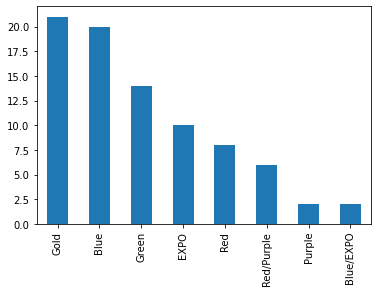

In [20]:
metro['LINE'].value_counts().plot.bar()

In [15]:
# try it yourself. find the unique values for LINENUM


### Trimming the data
Oftentimes, we import data and it has too many columns. It is always good practice to elimnate those rows that you are sure you will not use, and keep your data "clean" and "mean."



In [21]:
metro[['LINE','LINENUM','STATION','LAT','LONG','geometry']]

,LINE,LINENUM,STATION,LAT,LONG,geometry
0,Blue,801,Downtown Long Beach Station,33.768071,-118.192921,POINT (6503030.095 1738033.828)
1,Blue,801,Pacific Ave Station,33.772258,-118.193700,POINT (6502796.262 1739558.050)
2,Blue,801,Anaheim Street Station,33.781830,-118.189384,POINT (6504114.567 1743039.068)
3,Blue,801,Pacific Coast Hwy Station,33.789090,-118.189382,POINT (6504120.152 1745681.179)
4,Blue,801,Willow Street Station,33.807079,-118.189834,POINT (6503995.170 1752228.119)
...,...,...,...,...,...,...
78,Gold,804,Del Mar Station,34.141910,-118.148214,POINT (6516818.973 1874058.989)
79,Gold,804,Memorial Park Station,34.148356,-118.147512,POINT (6517034.832 1876404.492)
80,Gold,804,Lake Station,34.151806,-118.131390,POINT (6521914.408 1877653.241)
81,Gold,804,Allen Station,34.152417,-118.114348,POINT (6527070.744 1877869.293)


Wait, why the double square brackets? `[[...]]`

The reason for this is that we are feeding the dataframe a list of column names. Another way to do the same thing would be:

In [22]:
# list of desired column names
desired_columns = ['LINE','LINENUM','STATION','LAT','LONG','geometry']

# subset based on desired columns
metro[desired_columns]

,LINE,LINENUM,STATION,LAT,LONG,geometry
0,Blue,801,Downtown Long Beach Station,33.768071,-118.192921,POINT (6503030.095 1738033.828)
1,Blue,801,Pacific Ave Station,33.772258,-118.193700,POINT (6502796.262 1739558.050)
2,Blue,801,Anaheim Street Station,33.781830,-118.189384,POINT (6504114.567 1743039.068)
3,Blue,801,Pacific Coast Hwy Station,33.789090,-118.189382,POINT (6504120.152 1745681.179)
4,Blue,801,Willow Street Station,33.807079,-118.189834,POINT (6503995.170 1752228.119)
...,...,...,...,...,...,...
78,Gold,804,Del Mar Station,34.141910,-118.148214,POINT (6516818.973 1874058.989)
79,Gold,804,Memorial Park Station,34.148356,-118.147512,POINT (6517034.832 1876404.492)
80,Gold,804,Lake Station,34.151806,-118.131390,POINT (6521914.408 1877653.241)
81,Gold,804,Allen Station,34.152417,-118.114348,POINT (6527070.744 1877869.293)


If you now print the dataframe, what happens?

In [30]:
metro.head()

,LINE,LINENUM,LINENUM2,STNSEQ,STNSEQ2,DIR,STOPNUM,STATION,LAT,LONG,TPIS_NAME,POINT_X,POINT_Y,geometry
0,Blue,801,0,21,0,None,80101,Downtown Long Beach Station,33.768071,-118.192921,Long Bch,6.503030e+06,1.738034e+06,POINT (6503030.095 1738033.828)
1,Blue,801,0,22,0,North,80102,Pacific Ave Station,33.772258,-118.193700,Pacific,6.502796e+06,1.739558e+06,POINT (6502796.262 1739558.050)
2,Blue,801,0,18,0,None,80105,Anaheim Street Station,33.781830,-118.189384,Anaheim,6.504115e+06,1.743039e+06,POINT (6504114.567 1743039.068)
3,Blue,801,0,17,0,None,80106,Pacific Coast Hwy Station,33.789090,-118.189382,PCH,6.504120e+06,1.745681e+06,POINT (6504120.152 1745681.179)
4,Blue,801,0,16,0,None,80107,Willow Street Station,33.807079,-118.189834,Willow,6.503995e+06,1.752228e+06,POINT (6503995.170 1752228.119)


What happened? Why has the dataframe reverted to the original data?

That's right. In order to preserve your new dataframe, you have to **declare** it as a new variable.

In [26]:
metro_trimmed = metro[desired_columns]
metro_trimmed

,LINE,LINENUM,STATION,LAT,LONG,geometry
0,Blue,801,Downtown Long Beach Station,33.768071,-118.192921,POINT (6503030.095 1738033.828)
1,Blue,801,Pacific Ave Station,33.772258,-118.193700,POINT (6502796.262 1739558.050)
2,Blue,801,Anaheim Street Station,33.781830,-118.189384,POINT (6504114.567 1743039.068)
3,Blue,801,Pacific Coast Hwy Station,33.789090,-118.189382,POINT (6504120.152 1745681.179)
4,Blue,801,Willow Street Station,33.807079,-118.189834,POINT (6503995.170 1752228.119)
...,...,...,...,...,...,...
78,Gold,804,Del Mar Station,34.141910,-118.148214,POINT (6516818.973 1874058.989)
79,Gold,804,Memorial Park Station,34.148356,-118.147512,POINT (6517034.832 1876404.492)
80,Gold,804,Lake Station,34.151806,-118.131390,POINT (6521914.408 1877653.241)
81,Gold,804,Allen Station,34.152417,-118.114348,POINT (6527070.744 1877869.293)


### Subsetting/querying/filtering the data

What if you only want to see a subset of the data? Or create a new table based on a query?

In [31]:
expo = metro_trimmed[metro.LINE == 'EXPO']
expo.head()

,LINE,LINENUM,STATION,LAT,LONG,geometry
20,EXPO,806,LATTC / Ortho Institute Station,34.029112,-118.273603,POINT (6478766.175 1833089.413)
21,EXPO,806,Jefferson / USC Station,34.022123,-118.278118,POINT (6477391.116 1830549.740)
22,EXPO,806,Expo Park / USC Station,34.018227,-118.285734,POINT (6475079.285 1829138.386)
23,EXPO,806,Expo / Vermont Station,34.018245,-118.291540,POINT (6473319.888 1829149.989)
24,EXPO,806,Expo / Western Station,34.018331,-118.308910,POINT (6468056.285 1829197.007)


In [ ]:
# try it yourself. create variables for each unique LINE in the dataframe


## Plotting

We have now imported a shapefile, trimmed it, and created a series of queried subsets. Let's visualize our data. First, simply pass it the `plot()` command to see what it looks like.

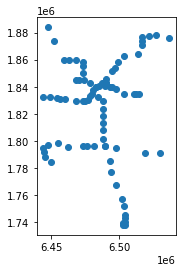

In [32]:
metro_trimmed.plot()

That's great! Very rewarding, with a single command. The reason it is able to plot the station points is because of the `geometry` column that is created from the shapefile.

In [33]:
metro_trimmed.geometry

0     POINT (6503030.095 1738033.828)
1     POINT (6502796.262 1739558.050)
2     POINT (6504114.567 1743039.068)
3     POINT (6504120.152 1745681.179)
4     POINT (6503995.170 1752228.119)
                   ...               
78    POINT (6516818.973 1874058.989)
79    POINT (6517034.832 1876404.492)
80    POINT (6521914.408 1877653.241)
81    POINT (6527070.744 1877869.293)
82    POINT (6537094.647 1876161.862)
Name: geometry, Length: 83, dtype: geometry

## A prettier plot

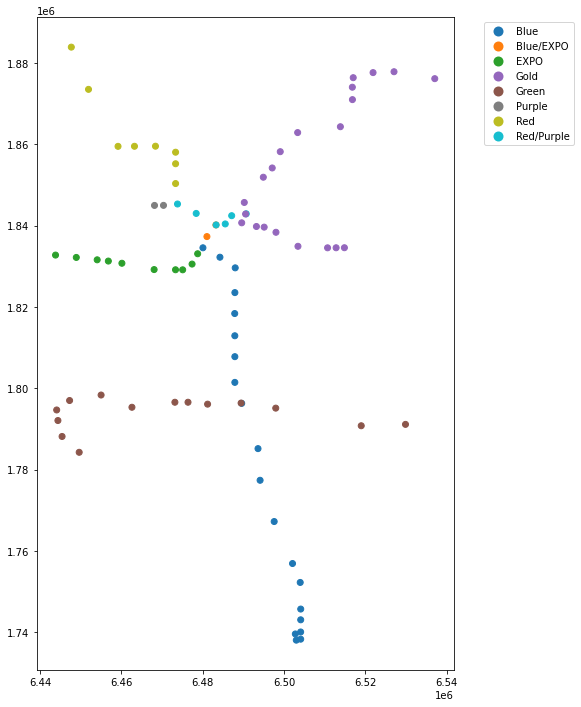

In [34]:
metro_trimmed.plot(figsize=(20,12),   #size of the plot (a bit bigger than the default)
           column = 'LINE',   # column that defines the color of the dots
           legend = True,     # add a legend           
           legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
           }                  # this puts the legend to the side
          ) 

## Back to mapping
We can't finish our lesson without a map :). Let's go back to the original metro dataset that was the inspiration for this notebook. Recall that we used the module `geopandas` to define the data.

In [35]:
metro_trimmed.head()

,LINE,LINENUM,STATION,LAT,LONG,geometry
0,Blue,801,Downtown Long Beach Station,33.768071,-118.192921,POINT (6503030.095 1738033.828)
1,Blue,801,Pacific Ave Station,33.772258,-118.193700,POINT (6502796.262 1739558.050)
2,Blue,801,Anaheim Street Station,33.781830,-118.189384,POINT (6504114.567 1743039.068)
3,Blue,801,Pacific Coast Hwy Station,33.789090,-118.189382,POINT (6504120.152 1745681.179)
4,Blue,801,Willow Street Station,33.807079,-118.189834,POINT (6503995.170 1752228.119)


## Projections

In [36]:
# what is the projection?
metro_trimmed.crs

<Projected CRS: EPSG:2874>
Name: NAD83(HARN) / California zone 5 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - California - SPCS83 - 5
- bounds: (-121.42, 32.76, -114.12, 35.81)
Coordinate Operation:
- name: SPCS83 California zone 5 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [37]:
# let's reproject it
metro_gcs = metro_trimmed.to_crs("EPSG:4326")

In [40]:
type(metro_gcs.geometry)

geopandas.geoseries.GeoSeries

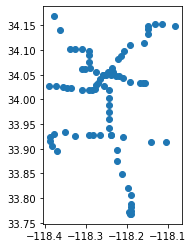

In [41]:
metro_gcs.plot()

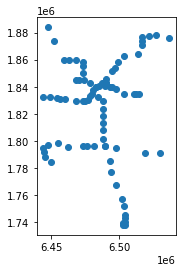

In [42]:
# what did it look like before we reprojected it?
metro_trimmed.plot()

## Iterating through rows in a dataframe

You learned how to loop through a python list. Looping over rows in a dataframe is similar, but the syntax is slightly different.

In [46]:
for index, row in metro_gcs.iterrows():
    print(index, row.STATION, row.LINE)

0 Downtown Long Beach Station Blue
1 Pacific Ave Station Blue
2 Anaheim Street Station Blue
3 Pacific Coast Hwy Station Blue
4 Willow Street Station Blue
5 Wardlow Station Blue
6 Del Amo Station Blue
7 Artesia Station Blue
8 Compton Station Blue
9 Willowbrook - Rosa Parks Station - Metro Blue Line Blue
10 103rd Street / Watts Towers  Station Blue
11 Firestone Station Blue
12 Florence Station Blue
13 Slauson Station Blue
14 Vernon Station Blue
15 Washington Station Blue
16 San Pedro Street Station Blue
17 Grand / LATTC Station Blue
18 Pico Station Blue/EXPO
19 7th Street / Metro Center Station - Metro Blue & Expo Lines Blue/EXPO
20 LATTC / Ortho Institute Station EXPO
21 Jefferson / USC Station EXPO
22 Expo Park / USC Station EXPO
23 Expo / Vermont Station EXPO
24 Expo / Western Station EXPO
25 Expo / Crenshaw Station EXPO
26 Farmdale Station EXPO
27 Expo / La Brea / Ethel Bradley Station EXPO
28 La Cienega / Jefferson Station EXPO
29 Culver City Station EXPO
30 1st Street Station Blue


## Get average lat/lon's

In [47]:
latitude = metro_trimmed.LAT.mean()
latitude

34.00158291566265

In [48]:
longitude = metro_trimmed.LONG.mean()
longitude

-118.251045313253

## Mapping with folium

Now it's time for another module. Everybody, please welcome `folium`. Folium brings leaflet, an open source javascript mapping library into our Python environment, allowing you to create instant interactive maps. Try it:

In [49]:
import folium

In [50]:
#initialize map
m = folium.Map(location=[latitude,longitude], tiles='Stamen Terrain', zoom_start=10)
m

### Adding point markers

In [ ]:
# add the stations
for index, row in metro_trimmed.iterrows():
    folium.Marker([row.LAT,row.LONG], popup=row.STATION+' '+str(row.LINENUM), tooltip=row.STATION).add_to(m)
m

In [ ]:
# add a column
metro_trimmed['color'] = ''

In [ ]:
metro_trimmed.head()

## Unique values in a column

In [ ]:
metro_trimmed.LINE.unique()

In [ ]:
# display rows that match a query
metro_trimmed.loc[metro['LINE'] == 'EXPO']

## Update a column based on a query on another column

In [ ]:
metro_trimmed.loc[metro['LINE'] == 'EXPO', 'color'] = 'orange'

In [ ]:
metro_trimmed.loc[metro['LINE'] == 'Blue', 'color'] = 'blue'
metro_trimmed.loc[metro['LINE'] == 'Blue/EXPO', 'color'] = 'cadetblue'
metro_trimmed.loc[metro['LINE'] == 'Red', 'color'] = 'red'
metro_trimmed.loc[metro['LINE'] == 'Red/Purple', 'color'] = 'darkred'
metro_trimmed.loc[metro['LINE'] == 'Purple', 'color'] = 'purple'
metro_trimmed.loc[metro['LINE'] == 'Green', 'color'] = 'green'
metro_trimmed.loc[metro['LINE'] == 'Gold', 'color'] = 'beige'



In [ ]:
metro_trimmed.sample(5)

In [ ]:
# reset the map
m = folium.Map(location=[latitude,longitude], tiles='Stamen Terrain', zoom_start=10)

# add the stations with color icons
for index, row in metro_trimmed.iterrows():
    folium.Marker([row.LAT,row.LONG], popup=row.STATION, tooltip=row.STATION,icon=folium.Icon(color=row.color)).add_to(m)
m

In [ ]:
m.save('metro.html')